# 2IS50 - Exercises 6 (2019-2020)

This notebook contains exercises for:

* Argument gathering
* Subclasses, inheritance, polymorphism
* Recursion


# Introduction to this template notebook

* This is a **personal** notebook. 
* Make sure you work in a **copy** of `...-template.ipynb`,
    **renamed** to `...-yourIDnr.ipynb`,
    where `yourIDnr` is your TU/e identification number.  
* In case of two authors, include both id. numbers:
    `...-firstIDnr-secondIDnr.ipynb`.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be done within your programming homework group.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python 3 code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
<br/>
NEVER write code that is needed for grading <i>outside</i> the marked blocks.
It is invisible there.
</div>

Proceed in this notebook as follows:
* **Personalize** the notebook (see below)
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following lines of code (`AUTHOR2_...` only when applicable):

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'  # when first modified, e.g. '2019-02-26'

  AUTHOR2_NAME = 'Not Applicable'
  AUTHOR2_ID_NR = 'Not Applicable'
  ```

1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ as strings between quotes.
1. When applicable, also copy and fill in the name and id.nr. for the second author.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Carlijn Sebregts'
AUTHOR_ID_NR = '1467972'
AUTHOR_DATE = '2020-06-04'

#// END_TODO [Author]

AUTHOR_NAME, AUTHOR_ID_NR, AUTHOR_DATE

('Carlijn Sebregts', '1467972', '2020-06-04')

### Important Reminder

* Follow our [Python Coding Standard](https://canvas.tue.nl/courses/11343/files/folder/programmeren/Course%20materials?preview=1996396)
    (see [Canvas, Week 2](https://canvas.tue.nl/courses/11343/pages/programming-week-2)).
    * In particular, all function definitions must have **type hints** and a **docstring**.
* For each function, include some automated test cases in the docstring, using the **`doctest`** format.  

The following cell will attempt to enable `mypy` type checking in the notebook.
For this to work, you need to install [Nb-Mypy](https://gitlab.tue.nl/jupyter-projects/nb-mypy).
This is experimental, and optional.

**NOTES**:
* Nb-Mypy was updated (to version 2020.6.0) to fix interaction with the logger of `matplotlib`.
  (Please, update your `nb-mypy.py`; see installation link above.)
* Type checking can be picky.  In some cases, you can ignore the `nb-mypy` message.

In [2]:
# enable mypy type checking
if 'nb_mypy' in get_ipython().magics_manager.magics.get('line'):
    %nb_mypy -v
    %nb_mypy On
    %nb_mypy
else:
    print("nb-mypy.py not installed")

nb-mypy.py not installed


Run the import cell below.  
This will add more functions to Python to use in the exercises.

In [3]:
import math
import random
import collections as co
import itertools as it
from typing import Tuple, List, Set, Dict, Counter
from typing import Any, Optional, Sequence, Mapping, Iterable, Iterator, Generator
from typing import NewType, TypeVar
from pprint import pprint
import doctest

And to do some data analytics with plots (this requires `matplotlib` and `seaborn`):

In [4]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults

In [5]:
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

## 6.1. Argument Gathering

### 6.1.a. `mean`

Define function `mean` that returns the [_arithmetic mean_](https://en.wikipedia.org/wiki/Arithmetic_mean) of all its arguments.
In a formula, the arithmetic mean of values $s_1, s_2, \ldots, s_n$ equals
$$ \frac{1}{n} \sum_{i=1}^{n} s_i $$

This is a _measure of central tendency_.

**Examples**:
* `mean(1.0)` returns `1.0`
* `mean(1, 2, 4, 8)` returns `3.75`
* `mean()` raises an `AssertionError`

**Notes**:
* All numbers involved have type `float`.
* Function `mean` has a variable number of arguments.
* You need at least _three_ `doctest` examples:
  - without arguments, to test the `AssertionError`
  - with a single argument (boundary case)
  - with more than one argument (typical case)

In [6]:
#// BEGIN_TODO [mean]

def mean(*args: Any) -> Any:
    """ Returns the mean value of provided values, return assertion error if no values provided 
    >>> mean()
    AssertionError
    >>> mean(1.0)
    1.0
    >>> mean(1,2,4,8)
    3.75
    """
    try:
        return sum(args)/len(args)
    except:
        return AssertionError
    
#// END_TODO [mean]
mean(1,2,4,8)

3.75

In [7]:
doctest.run_docstring_examples(mean, globals(), verbose=True, name='mean')

Finding tests in mean
Trying:
    mean()
Expecting:
    AssertionError
**********************************************************************
File "__main__", line 5, in mean
Failed example:
    mean()
Expected:
    AssertionError
Got:
    <class 'AssertionError'>
Trying:
    mean(1.0)
Expecting:
    1.0
ok
Trying:
    mean(1,2,4,8)
Expecting:
    3.75
ok


### 6.1.b. `mean_mad`

Define function `mean_mad` that returns a tuple of
* the arithmetic mean and
* the [_mean absolute deviation_](https://en.wikipedia.org/wiki/Law_of_large_numbers)
  (MAD) of all its arguments.

The MAD equals the arithmetic mean of the the absolute difference between the given values and
their arithmetic mean.
In a formula, the mean absolute deviation of values $s_1, s_2, \ldots, s_n$ equals
$$ \frac{1}{n} \sum_{i=1}^{n} \left|s_i - \mu(s)\right| $$
where $\mu(s)$ is the arithmetic mean of the $s$-values.

The MAD is a *measure of variability* or *dispersion*,
that is simpler than the standard deviation or variance.

**Examples**:
* `mean_mad(1.0)` returns `0.0`
* `mean_mad(1, 2, 4, 8)` returns `2.25`
* `mean_mad()` raises an `AssertionError`

**Notes**:
* All numbers have type `float`.
* In the `doctest` examples, use the same inputs as for `mean`.
* Avoid recomputation of the mean.
* Use `mean` twice (the first time it is needed to compute $\mu(s)$).
* You can use the built-in function `abs` to take the absolute value.
* Use a _generator expression_ as argument of the second call to `mean`
  - This avoids storing all absolute deviations before computing their mean.
  - You will need to prefix that generator expression with `*`,
    when feeding it into `mean`.

In [29]:
#// BEGIN_TODO [mean_mad]

def mean_mad(*args:Any)-> Any:
    """ Returns the mean and the MAD for the arguments, returns AssertionError if no arguments provided
    >>> mean_mad()
    AssertionError
    >>> mean_mad(1.0)
    (1.0, 0.0)
    >>> mean_mad(1,2,4,8)
    (3.75, 2.25)
    """
    #try:
    m = mean(*args)
    print(m)
    a = list(abs(arg - m) for arg in args)
    print(sum(a)/len(a))
    print(mean(a))
    MAD = mean(list(abs(arg - m) for arg in args))
    return (m, MAD)
    #except:
      #  return AssertionError

#// END_TODO [mean_mad]

mean_mad(1,2,4,8)

3.75
2.25
<class 'AssertionError'>


(3.75, AssertionError)

In [30]:
doctest.run_docstring_examples(mean_mad, globals(), verbose=True, name='mean_mad')

Finding tests in mean_mad
Trying:
    mean_mad()
Expecting:
    AssertionError
**********************************************************************
File "__main__", line 5, in mean_mad
Failed example:
    mean_mad()
Exception raised:
    Traceback (most recent call last):
      File "/Users/carlijnsebregts/anaconda3/lib/python3.7/doctest.py", line 1329, in __run
        compileflags, 1), test.globs)
      File "<doctest mean_mad[0]>", line 1, in <module>
        mean_mad()
      File "<ipython-input-29-1de219afaa04>", line 16, in mean_mad
        print(sum(a)/len(a))
    ZeroDivisionError: division by zero
Trying:
    mean_mad(1.0)
Expecting:
    (1.0, 0.0)
**********************************************************************
File "__main__", line 7, in mean_mad
Failed example:
    mean_mad(1.0)
Expected:
    (1.0, 0.0)
Got:
    1.0
    0.0
    <class 'AssertionError'>
    (1.0, <class 'AssertionError'>)
Trying:
    mean_mad(1,2,4,8)
Expecting:
    (3.75, 2.25)
*********************

### 6.1.c. MAD Experiment (Law of Large Numbers)

Let's do an experiment to see how the MAD varies
when it is taken over larger samples.

Consider random `float` numbers uniformly chosen from the unit interval $[0, 1)$.
Their expected value is $0.5$.
The mean taken over $n$ numbers will not equal $0.5$,
but the larger $n$, the closer it clusters around $0.5$
(less variability: [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)).

Function `experiment` defined below, computes the mean of `n` random numbers
uniformly selected from the unit interval.

For each fixed value of `n > 1`, its outcomes are again random, with mean $0.5$, 
but their distribution is no longer uniform (see the plots that follow).

In [31]:
def experiment(n: int) -> float:
    """Mean of n random numbers, uniformly selected from the unit interval.
    """
    sample = (random.random() for _ in range(n))  # generator expression
    return mean(*sample)

Here are distribution density plots for several values of `n`,
each based on 1000 experiments.
You can see that the variability (dispersion) gets smaller as `n` gets larger.

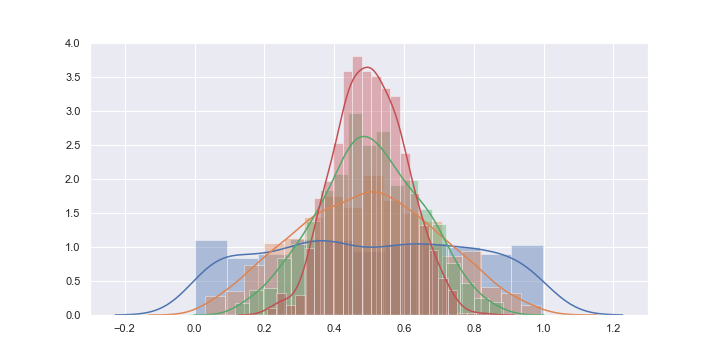

In [32]:
sns.distplot([experiment(1) for _ in range(1000)], norm_hist=True)
sns.distplot([experiment(2) for _ in range(1000)], norm_hist=True)
sns.distplot([experiment(4) for _ in range(1000)], norm_hist=True)
sns.distplot([experiment(8) for _ in range(1000)], norm_hist=True);

## Theory predicts that the MAD is approximately proportial to $1/\sqrt{n}$.
That is, when $n$ is increased by a factor $k$,
the MAD goes down by a factor $\sqrt{k}$.
E.g., if you want to reduce the MAD by a factor 10, you need 100 times the number of samples.

Write code to print four columns for 1000 repetitions of `experiment(n)` each:
* `n`,
* the mean,
* the MAD, and
* the ratio of previous MAD with current MAD,

where `n` starts at 2 and each time is multiplied by 4, ending with `n` equal 8192.

**Example**:
The first rows look like this (but most likely are not identical):
```
      n    mean     MAD   ratio
      2 0.50063 0.15843      NA
      8 0.49513 0.08274 1.91473
     32 0.50138 0.03952 2.09389
```

**Notes**:
* Print a header line with texts `n`, `mean`, `MAD`, `ratio`.
* Print output in four _right-aligned_ columns of width 7
  (this also applies to the columns headers),
  where mean, MAD, and ratio are each shown with five decimal places.
  - You can use format specifiers like `:>7` and `:7.5f`.
* For `n == 2`, the `ratio` is not defined and printed as `NA`
  (Not Applicable).
* Use `experiment` and `mean_mad`.
  - Don't use `mean` (that is also returned by `mean_mad`.

In [42]:
#// BEGIN_TODO [MAD experiment]

n_list = list(n*4 for n in range(2, 100))
mean = experiment(n) for n in n_list 
MAD = list(1/sqrt(n) for n in n_list)
ratio = list(MAD(a)/MAD(a-1) for a in range(100)) 

t = Table([n_list, mean, MAD, ratio], names=('n', 'mean', 'MAD', 'ratio'))

#// END_TODO [MAD experiment]
t

SyntaxError: invalid syntax (<ipython-input-42-e0d78083a6b1>, line 4)

Run the cell above a couple of times.

Do you indeed see that the MAD is roughly halved for every fourfold increase of `n`?

### Extra: How to use the MAD

Here is the distribution density plot for `experiment(8192)` (based on 1000 such experiments).
Notice the narrow range on the x-axis:
* Most (99.8%) of the outcomes lie within **four times the MAD around the mean** ($0.5\pm 0.01$).

In [ ]:
sns.distplot([experiment(8192) for _ in range(1000)], norm_hist=True);

This can be exploited in two ways:

1. Suppose you want to estimate the mean based on a given sample size (our `n`).
   Then you can also estimate the *accuracy* of that estimate:
   - With a high probability (approx. 99.8%),
     the _true mean_ (the expectation) lies within **four times the MAD** of that estimated mean.
2. Suppose you want to estimate the expected value (true mean)
   to a given accuracy with high probability.
   Then you can calculate _the required sample size_ (our `n`).
   For example:
   - We want an estimate that, with high probability, deviates no more than $\varepsilon = 0.001$
     from the true value.
   - For $n=8\,192$, four times the MAD is roughly $0.01$.
   - So, for $n = 8\,192k$, _four times the MAD_ is roughly $\frac{0.01}{\sqrt{k}}$.
   - Hence, we need $k=100$, or $n =  819\,200$ to achieve that accuracy.

In [ ]:
experiment(819_200)  # only one call needed

## 6.2. Beating Some RPS Players

Given is the module `rps` with some definitions for Rock-Paper-Scissors (RPS).
These are (a slight variation on) the definitions in Lectures 4-B and 6-A.
Make sure that the file `rps.py` is in the same directory as this notebook.

Overview of `rps` (also see `help(rps)` below):
* Type `Option` with values `ROCK`, `PAPER`, `SCISSORS`, combined in list `OPTIONS`
* Type `Outcome` with values `TIE`, `WIN`, `LOSS` (from perspective of first player)
* Function `judge_encounter`, taking two `Option` values and returning an `Outcome`
* Type `Distribution` and function `random_choice`
* Abstract base class `Player`
* Class `OutcomeStats`
* Class `Referee`, with two `Player` objects, and
  - Method `play_encounter`, for a single encounter between the two players
  - Method `play_games`, to play multiple encounters, returning outcome statistics

In [43]:
import rps  # to run its doctest examples, and to get help
from rps import *

ModuleNotFoundError: No module named 'rps'

In [34]:
doctest.testmod(rps, verbose=False, name='rps')

NameError: name 'rps' is not defined

In [ ]:
help(rps)

### Given Class `MarkovPlayer`

In Lecture 6-A, a player `MarkovPlayer` was defined
that chooses according to a distribution
depending on its previous choice.
Here is its definition again.

In [ ]:
#: Type for order-1 Markov models
MarkovModel_1 = Mapping[Option, Distribution]

In [ ]:
class MarkovPlayer(Player):
    """A player who chooses according
    to given order-1 Markov model.
    
    First time, chooses uniformly among all options.
    """
    
    def __init__(self, name: str, mm: MarkovModel_1) -> None:
        """Initialize the player for given Markov model.
        """
        super().__init__(name)
        self.mm = mm
        self.previous: Optional[Option] = None
        
    def choose(self) -> Option:
        """Return player's choice.
        """
        distr: Distribution  # (needed for type checking)
        if self.previous is None:
            distr = [1, 1, 1]
        else:
            distr = self.mm[self.previous]
        choice = choose_random(distr)
        self.previous = choice
        return choice

In particular, player `markov` was defined,
who avoids its previous choice, and chooses among the remaining options with probability 0.5 each:

In [ ]:
mm = {ROCK:     [0.0, 0.5, 0.5],
      PAPER:    [0.5, 0.0, 0.5],
      SCISSORS: [0.5, 0.5, 0.0],
     }
markov = MarkovPlayer("Mar Kov", mm)

In [ ]:
# A run of 20 choices

[markov.choose() for _ in range(20)]

In [ ]:
# Overall statistics

Counter(markov.choose() for _ in range(10000))

### 6.2.a. Class `BeatMarkovPlayer`

Define player `BeatMarkovPlayer` who
* on the very first turn, chooses randomly (uniform)
* on all subsequent turns, chooses the best option to outplay `markov`
  (defined above).

**Notes**:
* Introduce an attribute `self.opponent_previous`
  that tracks the previous choice of the opponent.
* For that, you need to override `__init__()`.
  * Don't forget to call `super().__init__(name)`.
  * Initialize `self.opponent_previous` to `None`.
  * If you want to provide a type hint for `self.previous`,
    then use `Optional[Option]`.
* And you need to implement `inform()` to update `self.opponent_previous`.
* Implement `choose()`, using `self.opponent_previous`.
  * Here, you will have to think about what the best choice is to outplay `markov`.
  * To make the first choice, use `choose_random` from `rps`
    with distribution `[1/3, 1/3, 1/3]`.
* Don't forget the docstring of the class with some `doctest` examples.
  * You can make use of player `markov` defined above,
    to check that it never loses, except possibly on the first encounter.

In [ ]:
#// BEGIN_TODO [BeatMarkovPlayer] Player that outplays MarkovPlayer

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [BeatMarkovPlayer]

In [ ]:
doctest.run_docstring_examples(BeatMarkovPlayer, globals(), verbose=False, name='BeatMarkovPlayer')

Let them play 10 games together:

In [ ]:
referee = Referee(BeatMarkovPlayer('BMP'), markov)

referee.play_games(10, verbose=True)

### Given Class `BeatPreviousPlayer`

In Lecture 6-A, a player `BeatPreviousPlayer` was defined
that chooses to beat the opponent's previous choice.
Here is its definition again.

In [ ]:
class BeatPreviousPlayer(Player):
    """A player who chooses to beat
    opponent's previous choice.
    
    First time, chooses uniformly among all options.
    
    >>> player = BeatPreviousPlayer("Test")
    >>> player
    BeatPreviousPlayer('Test')
    >>> player.choose() in OPTIONS
    True
    >>> player.inform(ROCK)
    >>> player.choose() == PAPER
    True
    """
    
    def __init__(self, name: str):
        """Initalize the player.
        """
        super().__init__(name)
        self.opponent_previous: Optional[Option] = None
        
    def choose(self) -> Option:
        if self.opponent_previous is None:
            choice = choose_random([1/3, 1/3, 1/3])
        else:
            choice = Option((self.opponent_previous + 1) % len(OPTIONS))
            
        return choice

    def inform(self, opponent_previous: Option) -> None:
        self.opponent_previous = opponent_previous

In [ ]:
doctest.run_docstring_examples(BeatPreviousPlayer, globs=globals(), name='BeatPreviousPlayer')

### 6.2.b. Class `BeatBeatPreviousPlayer`

Define player `BeatBeatPreviousPlayer` who
* on the very first turn, chooses randomly (uniform)
* on all subsequent turns, chooses the option that beats `BeatPreviousPlayer`.

**Notes**:
* Define `BeatBeatPreviousPlayer` as _subclass_ of `MarkovPlayer`.
* Override `__init__()`, to call `super().__init__(name, mm)`
  for an appropriately chosen order-1 Markov model.
  - Hint: That order-1 Markov model can be *degenerate*,
    that is, it can have only probabilities that are either 0.0 or 1.0.
* You don't need to override `choose()` or `inform()`.
* Don't forget the docstring of the class with some `doctest` examples.

In [ ]:
#// BEGIN_TODO [BeatBeatPreviousPlayer] Player that beats BeatPreviousPlayer

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [BeatBeatPreviousPlayer]

In [ ]:
doctest.run_docstring_examples(BeatBeatPreviousPlayer, globals(), verbose=False, name='BeatBeatPreviousPlayer')

Let them play 10 games together:

In [ ]:
referee = Referee(BeatBeatPreviousPlayer('BBP'), BeatPreviousPlayer('BP'))

referee.play_games(10, verbose=True)

## 6.3. Recursive QuickSort

Define _recursive_ function `qsort` that given a sequence,
returns a list with the items of that sequence in sorted order,
using the _QuickSort_ algorithm (see Notes below).

**Notes**

* The **base case** is an empty sequence,
  where the result is the empty list.
* For the **inductive step** (sequence is non-empty):
  - let `x` be the first item of the sequence;
  - split the remainder of the sequence (`s[1:]`) into
    a list of items `<= x` and a list of items `> x`
    (using *list comprehensions*);
  - sort each of these sublists (using `qsort` recursively;
    here you make a **leap of faith**);
  - combine the two sorted results appropriately with `x` into a sorted list
    and return it.

In [ ]:
def qsort(s: Sequence[Any]) -> List[Any]:
    """Return items in s as sorted list, using the recursive QuickSort algorithm.
    
    Assumption: items can be compared by <
    
    >>> qsort(())
    []
    >>> qsort([42])
    [42]
    >>> ''.join(qsort('abracadabra'))
    'aaaaabbcdrr'
    """
    
#// BEGIN_TODO [qsort] Sort sequence into list using recursive QuickSort

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [qsort]

In [ ]:
doctest.run_docstring_examples(qsort, globals(), verbose=True, name='qsort')

## 6.4. Recursive Binary Search

We provided the framework for function `binary_search` that,
given a sorted sequence of values and a value,
retuns an index where that value can be inserted into the sequence
to preserve the sorted order (also see given docstring below).

That is, if `i` is returned, then the value can be inserted between index `i - 1` and `i`.
Thus, the item would occur at index `i` after it has been inserted.
Also see `list.insert()`.

Complete the definition of _nested recursive_ function `rec`.

**Example**:
* `binary_search('ac', 'b')` returns `1`

**Notes**:
* This function solves the same problem as Exercise 4.1.
* We use type `Any` for the items in the sequence and the separate item.
  However, these should be of the _same_ type, and that type should support _comparison_ by `<`.
* The list `s` can be empty.
* The returned index `i` has the property `s[i - 1] <= x < s[i]`.
* Your solution for `rec` must be _efficient_ and *recursive*.
  - `rec(lo, hi)` solves the problem of finding an insertion location for `x` in `s[lo:hi]`.
  - The **base case** is when `hi - lo == 1`,
    or equivalently, when `lo == hi - 1`.
    What value can be returned in that case?
  - For the **inductive step**,
    - consider `m` near the middle between `lo` and `hi`, and
    - depending on `s[m] < x` or not, return `rec(lo, m)` or `rec(m, hi)`.
    - Here, you make a **leap of faith**.

In [ ]:
def binary_search(s: Sequence[Any], x: Any) -> int:
    """Find an index i such that s[i - 1] <= x < s[i].
    
    Pretend s[-1] == minf and s[len(s)] == pinf
    Here,
    * s[-1] refers to an imaginary item preceding s
    * s[len(s)] refers to an imaginary item following s
    * minf is an imaginary value that is smaller than any value in s
    * pinf is an imaginary value that is larger than any value in s
        
    >>> binary_search(list("bdfhjln"), "i")
    4
    >>> binary_search(list("bdfhjln"), "h")
    4
    >>> binary_search(list("bdfhjln"), "a")
    0
    >>> binary_search(list("bdfhjln"), "o")
    7
    """
    
    def rec(lo: int, hi: int) -> int:
        """Find an index i in s[lo+1:hi] such that
        
        * lo < i <= hi
        * s[i - 1] <= x < s[i]
        
        for the given s and x.
        
        Assumptions:
        
        * -1 <= lo < hi <= len(s)
        * s[lo] <= x < s[hi]
        """

#// BEGIN_TODO [rec] Find index to insert value in sorted sequence

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [rec]

    return rec(-1, len(s))

In [ ]:
doctest.run_docstring_examples(binary_search, globals(), verbose=True, name='binary_search')

---


## How to submit your work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.

2. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.

3. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.

* In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  
* If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.


## Final business

In [ ]:
doctest.testmod(verbose=False)  # with details

In [ ]:
%whos

---

## (End of Notebook)

&copy; 2019-2020 - **TU/e** - Eindhoven University of Technology